<h1>Penjelasan </h1>

Pada pertemuan ini, kita akan belajar Topic Modeling menggunakan algoritme LDA (Latent Dirichlet Allocation). Kasus yang akan kita selesaikan yaitu terkait dokumen berita. Kita akan mengekstrak dokumen berita tersebut untuk mendapatkan topik-topik penting yang ada di dalamnya.

Proses menyelesaikan masalah di atas menggunakan pipeline pada Gambar di bawah ini:

1. Data collection 
2. Pre-processing
3. Feature Extraction
4. Menentukan Nilai K terbaik
5. Topic Modeling menggunakan LDA
6. Mencari kesimpulan terhadap topik yang terbentuk

<h1>Topic Modeling Pipeline</h1>
<img align=center src= "https://undangmi.com/wp-content/uploads/2022/09/LDA-pipeline.png">

# 01 Data Acquisition

In [2]:
#Import library yang dibutuhkan
import re, string, unicodedata #modul regular expression
import nltk
from nltk import word_tokenize, sent_tokenize #Paket ini membagi teks input menjadi kata-kata.,
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [4]:
#reading the dataset
data= pd.read_csv('Twitter_Emotion_Dataset.csv')
data.head(5)

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."


# 02 Text Preprocessing

## Case Folding

In [5]:
import re

# Buat fungsi untuk langkah case folding
def casefolding(text):
    text = text.lower()                               # Mengubah teks menjadi lower case
    text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
    text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
    text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
    text = text.strip()
    return text

In [6]:
raw_sample = data['tweet'].iloc[100]
case_folding = casefolding(raw_sample)

print('Raw data\t: ', raw_sample)
print('\n\nCase folding\t: ', case_folding)

Raw data	:  [USERNAME] saya kan datang untuk bertanya, kemudian ngobrol tuh sama mba mba Help desk. tapi saya tetep ga ngerti karena ga dapet jawaban yg menjawab pertanyaan saya. trus mbanya lama lama agak emosi, yaudah makin ga kejawab dong, trus saya pulang.


Case folding	:  username saya kan datang untuk bertanya kemudian ngobrol tuh sama mba mba help desk tapi saya tetep ga ngerti karena ga dapet jawaban yg menjawab pertanyaan saya trus mbanya lama lama agak emosi yaudah makin ga kejawab dong trus saya pulang


## Filtering (Stopword Removal)

In [7]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
len(stopwords_ind)

758

In [9]:
# Lihat daftar stopword yang disediakan NLTK
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [10]:
# Buat fungsi untuk langkah stopword removal

more_stopword = ['twupal', 'detikers']                    # Tambahkan kata dalam daftar stopword
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(text):
    clean_words = []
    text = text.split()
    for word in text:
        if word not in stopwords_ind:
            clean_words.append(word)
    return " ".join(clean_words)

In [11]:
raw_sample = data['tweet'].iloc[5]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw data\t: ', raw_sample)
print('\n\nCase folding\t: ', case_folding)
print('\n\nStopword removal\t: ', stopword_removal)

Raw data	:  Dari sekian banyak thread yang aku baca, thread ini paling aneh sih dalam penulisan. Sumpah aneh bgt, mau ngatain "lebay" aja segala bikin thread hadeh. Aku juga ga jago nulis, tapi tulisan aku ga seberantakan thread mbaknya.


Case folding	:  dari sekian banyak thread yang aku baca thread ini paling aneh sih dalam penulisan sumpah aneh bgt mau ngatain lebay aja segala bikin thread hadeh aku juga ga jago nulis tapi tulisan aku ga seberantakan thread mbaknya


Stopword removal	:  sekian thread baca thread aneh sih penulisan sumpah aneh bgt ngatain lebay aja bikin thread hadeh ga jago nulis tulisan ga seberantakan thread mbaknya


## Stemming

In [12]:
!pip -q install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 13.0 MB/s eta 0:00:00


In [13]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
    text = stemmer.stem(text)
    return text

In [14]:
raw_sample       = data['tweet'].iloc[5]
case_folding     = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming    = stemming(stopword_removal)

print('Raw data\t: ', raw_sample)
print('\n\nCase folding\t: ', case_folding)
print('\n\nStopword removal\t: ', stopword_removal)
print('\n\nStemming\t: ', text_stemming)

Raw data	:  Dari sekian banyak thread yang aku baca, thread ini paling aneh sih dalam penulisan. Sumpah aneh bgt, mau ngatain "lebay" aja segala bikin thread hadeh. Aku juga ga jago nulis, tapi tulisan aku ga seberantakan thread mbaknya.


Case folding	:  dari sekian banyak thread yang aku baca thread ini paling aneh sih dalam penulisan sumpah aneh bgt mau ngatain lebay aja segala bikin thread hadeh aku juga ga jago nulis tapi tulisan aku ga seberantakan thread mbaknya


Stopword removal	:  sekian thread baca thread aneh sih penulisan sumpah aneh bgt ngatain lebay aja bikin thread hadeh ga jago nulis tulisan ga seberantakan thread mbaknya


Stemming	:  sekian thread baca thread aneh sih tulis sumpah aneh bgt ngatain lebay aja bikin thread hadeh ga jago nulis tulis ga beranta thread mbak


## Text Preprocessing Pipeline

In [15]:
# Buat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
    text = casefolding(text)
    text = remove_stop_words(text)
    #text = stemming(text)
    return text

In [16]:
!pip install swifter 

import swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 KB 31.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.3 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16321 sha256=6a84f5ab7c54d63dd1757bcd264217c8ab51022edf3611e2228eae5a05b0f592
  Stored in directory: /root/.cache/pip/wheels/2b/5e/f2/3931524f702ffd03309e96d35ee2fbf9c61c27377511ee8d4c
Successfully built swifter


In [17]:
%%time
data['clean_article'] = data['tweet'].swifter.apply(text_preprocessing_process)

# Perhatikan waktu komputasi ketika proses text preprocessing

Pandas Apply:   0%|          | 0/4401 [00:00<?, ?it/s]

CPU times: user 851 ms, sys: 6.81 ms, total: 858 ms
Wall time: 887 ms


In [18]:
data

,label,tweet,clean_article
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",jln jatibarupolisi tdk bs gertak gubernur eman...
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",cewe lho kayaknya rasain sibuk jaga rasain sak...
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,kepingin gudeg mbarek bu hj amad foto google s...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",jln jatibarubagian wilayah tn abangpengaturan ...
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata...",sharing pengalaman aja kemarin jam batalin tik...
...,...,...,...
4396,love,"Tahukah kamu, bahwa saat itu papa memejamkan m...",tahukah papa memejamkan matanya menahan gejola...
4397,fear,Sulitnya menetapkan Calon Wapresnya Jokowi di ...,sulitnya menetapkan calon wapresnya jokowi pil...
4398,anger,"5. masa depannya nggak jelas. lha iya, gimana ...",depannya nggak lha iya gimana coba lulusan sen...
4399,happy,[USERNAME] dulu beneran ada mahasiswa Teknik U...,username beneran mahasiswa teknik ui nembak pa...


In [19]:
#save data preprocessing
data.to_csv("dataset_preprocessing_news.csv")

# 03 Feature Extraction

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect =TfidfVectorizer(max_features=1000)
vect_text=vect.fit_transform(data['tweet'])

In [21]:
#Menampilkan vocabulary dari TF-IDF
vect.vocabulary_

{'soal': 855,
 'polisi': 729,
 'tdk': 891,
 'bs': 159,
 'gubernur': 302,
 'ikut': 341,
 'jgn': 381,
 'hak': 310,
 'abang': 2,
 'turun': 955,
 'perlu': 715,
 'username': 974,
 'url': 970,
 'sesama': 828,
 'cewe': 185,
 'lho': 511,
 'kayaknya': 423,
 'harusnya': 320,
 'bisa': 152,
 'lebih': 506,
 'lah': 492,
 'yang': 996,
 'harus': 319,
 'sibuk': 844,
 'jaga': 365,
 'diri': 235,
 'dan': 201,
 'pulang': 736,
 'malem': 541,
 'sendirian': 815,
 'gimana': 294,
 'orang': 672,
 'banyak': 86,
 'korban': 476,
 'takut': 880,
 'curhat': 197,
 'bukan': 164,
 'malah': 539,
 'bu': 161,
 'foto': 276,
 'dari': 204,
 'sengaja': 817,
 'biar': 143,
 'teman': 894,
 'jg': 380,
 'berbagi': 119,
 'itu': 359,
 'indah': 345,
 'sejak': 795,
 'skrg': 848,
 'semua': 812,
 'pihak': 720,
 'mohon': 611,
 'yg': 998,
 'punya': 738,
 'otak': 676,
 'dgn': 222,
 'wajar': 981,
 'ya': 991,
 'kamu': 405,
 'pengalaman': 705,
 'aja': 15,
 'kemarin': 440,
 'jam': 369,
 'tiket': 931,
 'di': 223,
 'pasar': 696,
 'lancar': 500,
 '

In [22]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
#Lihat data tabular yang menggunakan metode TF-IDF
#Data ini siap untuk dimasukkan dalam proses machine learning

x1 = vect.transform(data['tweet']).toarray()
data_tabular_tf_idf= pd.DataFrame(x1,columns=vect.get_feature_names_out())
data_tabular_tf_idf

,10,2018,abang,abis,acara,ada,adalah,adanya,adek,agak,...,wkwkwk,ya,yaa,yah,yak,yakin,yang,yaudah,yg,you
0,0.0,0.0,0.220769,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.183595,0.0,0.000000,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
3,0.0,0.0,0.322039,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.145430,0.0,0.0,0.0,0.0,0.000000,0.0,0.117537,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4396,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
4397,0.0,0.0,0.000000,0.0,0.0,0.113128,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.195821,0.0,0.000000,0.0
4398,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
4399,0.0,0.0,0.000000,0.0,0.0,0.150078,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


# 04 LDA Model

In [24]:
#Algoritme LDA (Latent Diriclet Allocation)
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=5,learning_method='online',random_state=0,max_iter=10) 

lda_top=lda_model.fit_transform(vect_text)

In [25]:
#Melihat probabilitas dokumen terhadap topik
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  30.361557944313617 %
Topic  1 :  5.001026753807064 %
Topic  2 :  4.810944853870433 %
Topic  3 :  4.74333976125226 %
Topic  4 :  55.08313068675661 %


In [26]:
data_cluster = []
for n in range(lda_top.shape[0]):
    topic_most_pr = lda_top[n].argmax()
    data_cluster.append(topic_most_pr)
    print("doc: {} topic: {}\n".format(n,topic_most_pr))
data ['cluster'] = data_cluster 

Output streaming akan dipotong hingga 5000 baris terakhir.
doc: 1901 topic: 1

doc: 1902 topic: 4

doc: 1903 topic: 1

doc: 1904 topic: 4

doc: 1905 topic: 4

doc: 1906 topic: 1

doc: 1907 topic: 2

doc: 1908 topic: 4

doc: 1909 topic: 1

doc: 1910 topic: 1

doc: 1911 topic: 4

doc: 1912 topic: 1

doc: 1913 topic: 1

doc: 1914 topic: 4

doc: 1915 topic: 1

doc: 1916 topic: 4

doc: 1917 topic: 4

doc: 1918 topic: 4

doc: 1919 topic: 3

doc: 1920 topic: 4

doc: 1921 topic: 1

doc: 1922 topic: 4

doc: 1923 topic: 4

doc: 1924 topic: 1

doc: 1925 topic: 1

doc: 1926 topic: 1

doc: 1927 topic: 1

doc: 1928 topic: 4

doc: 1929 topic: 4

doc: 1930 topic: 4

doc: 1931 topic: 1

doc: 1932 topic: 4

doc: 1933 topic: 1

doc: 1934 topic: 4

doc: 1935 topic: 1

doc: 1936 topic: 4

doc: 1937 topic: 1

doc: 1938 topic: 1

doc: 1939 topic: 4

doc: 1940 topic: 1

doc: 1941 topic: 1

doc: 1942 topic: 1

doc: 1943 topic: 1

doc: 1944 topic: 4

doc: 1945 topic: 1

doc: 1946 topic: 1

doc: 1947 topic: 4

d

In [28]:
vocab = vect.get_feature_names_out()
for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
jakarta secara indah sampah wah username masing gede warga gagal 

Topic 1: 
yg aku username di gue ya sama ga kalo aja 

Topic 2: 
jam di pagi gw bikin aja nonton pas mana sore 

Topic 3: 
islam selamat serta ulang up cowok mantan tsb kasus pemerintah 

Topic 4: 
yang username dan aku saya di kita cinta untuk tidak 



In [30]:
vocab = vect.get_feature_names_out()
for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t,end=" ")
    print("\n")

Topic 0: 
('jakarta', 11.884815608651524) ('secara', 10.694600903489647) ('indah', 9.729379157753865) ('sampah', 9.234524222135269) ('wah', 9.1651687023755) ('username', 9.148976236960618) ('masing', 8.21682310611264) ('gede', 7.8499785581114745) ('warga', 7.635081459852838) ('gagal', 7.40237857209053) 

Topic 1: 
('yg', 105.47490803009036) ('aku', 96.62372984376702) ('username', 88.78498557793479) ('di', 85.91787812963256) ('gue', 83.88071610512036) ('ya', 82.49173128578244) ('sama', 82.45439044615672) ('ga', 80.54370822148071) ('kalo', 77.37661186333844) ('aja', 70.02248972884465) 

Topic 2: 
('jam', 22.6645825225981) ('di', 21.19531627636392) ('pagi', 19.247023762647547) ('gw', 17.68063182191716) ('bikin', 15.3506589850404) ('aja', 15.329548479731448) ('nonton', 14.427722321283605) ('pas', 13.715969499091708) ('mana', 12.192956393732235) ('sore', 11.851180488779805) 

Topic 3: 
('islam', 10.84988928969114) ('selamat', 9.668455939563781) ('serta', 8.61511759441541) ('ulang', 8.339074

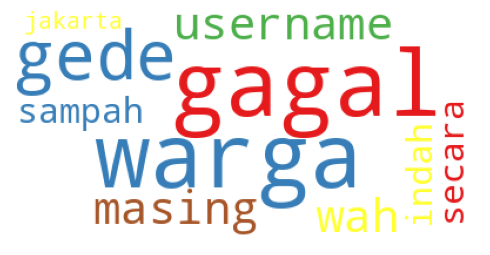

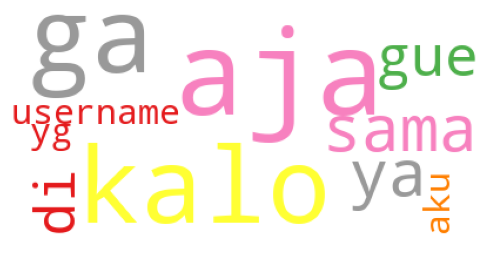

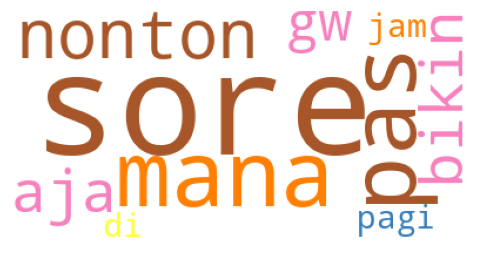

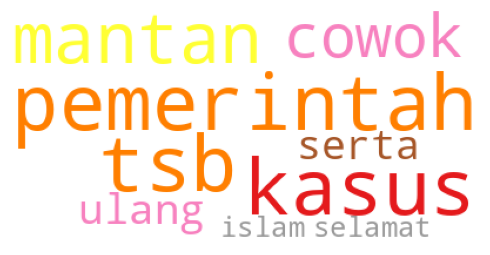

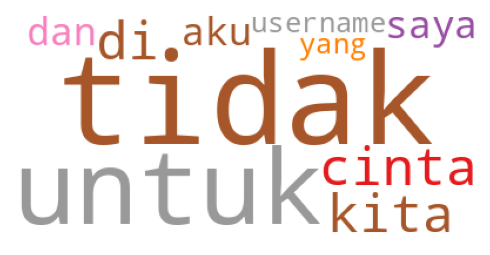

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


for index, topic in enumerate(lda_model.components_):
    tmps = [vect.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    text = " ".join(str(topik) for topik in tmps)
    wordcloud = WordCloud(max_words=10,colormap='Set1', background_color="white").generate(text)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()
 

In [33]:
data

,label,tweet,clean_article,cluster
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",jln jatibarupolisi tdk bs gertak gubernur eman...,4
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",cewe lho kayaknya rasain sibuk jaga rasain sak...,1
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,kepingin gudeg mbarek bu hj amad foto google s...,4
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",jln jatibarubagian wilayah tn abangpengaturan ...,1
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata...",sharing pengalaman aja kemarin jam batalin tik...,4
...,...,...,...,...
4396,love,"Tahukah kamu, bahwa saat itu papa memejamkan m...",tahukah papa memejamkan matanya menahan gejola...,4
4397,fear,Sulitnya menetapkan Calon Wapresnya Jokowi di ...,sulitnya menetapkan calon wapresnya jokowi pil...,4
4398,anger,"5. masa depannya nggak jelas. lha iya, gimana ...",depannya nggak lha iya gimana coba lulusan sen...,1
4399,happy,[USERNAME] dulu beneran ada mahasiswa Teknik U...,username beneran mahasiswa teknik ui nembak pa...,1
